<a href="https://colab.research.google.com/github/Sakib3602/ML/blob/main/outlier_handaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


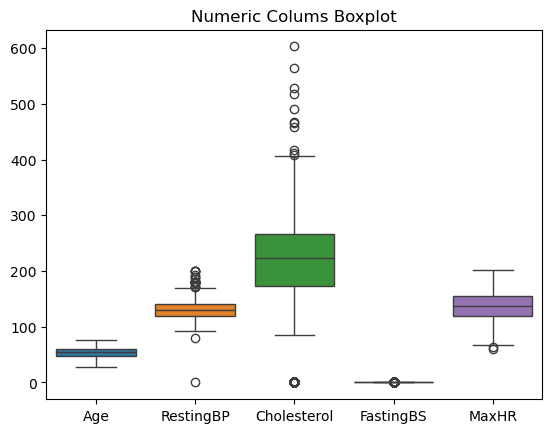

In [ ]:
numeric_cols = ["Age","RestingBP", "Cholesterol","FastingBS","MaxHR"]

sns.boxplot(data=df[numeric_cols])
plt.title("Numeric Colums Boxplot")
plt.show()

In [ ]:
out_choles = ["Cholesterol"]
q1 = df["Cholesterol"].quantile(0.25)
q3 = df["Cholesterol"].quantile(0.75)
iqr = q3 - q1
print(q1)
print(q3)
print("-------------")
print("IQR -> ", iqr)

173.25
267.0
-------------
IQR ->  93.75


In [ ]:
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

print(f"Lower Limit: {lower}, Upper Limit: {upper}")

Lower Limit: 32.625, Upper Limit: 407.625


There are 3 way to handle outliers
1. Remove the outlier
2. Convert the outliers upper and lower values
3. Use log (Perfect One)

In [ ]:
df1 = df.copy()

outliers = df1[(df1["Cholesterol"] < lower) | (df1["Cholesterol"] > upper)]

print(f"Total Outliers: {len(outliers)}")
print(f"Shape of df1: {df1.shape}")

Total Outliers: 183
Shape of df1: (918, 12)


In [ ]:
df1 = df1[(df1["Cholesterol"] >= lower) & (df1["Cholesterol"] <= upper)]
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df1.shape

(735, 12)

2. Make value Upper Lower

In [ ]:
df2 = df.copy()
df2["Cholesterol"] = df2["Cholesterol"].astype(float)
df2.loc[df2["Cholesterol"] < lower, "Cholesterol"] = lower
df2.loc[df2["Cholesterol"] > upper, "Cholesterol"] = upper

df2.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
503,51,M,ASY,132,227.0,1,ST,138,N,0.2,Up,0
533,63,M,ASY,110,252.0,0,ST,140,Y,2.0,Flat,1
624,63,F,ASY,150,407.0,0,LVH,154,N,4.0,Flat,1
14,42,F,NAP,115,211.0,0,ST,137,N,0.0,Up,0
798,42,F,ASY,102,265.0,0,LVH,122,N,0.6,Flat,0
737,57,M,ASY,152,274.0,0,Normal,88,Y,1.2,Flat,1
292,53,M,ASY,130,182.0,0,Normal,148,N,0.0,Up,0
56,31,M,ASY,120,270.0,0,Normal,153,Y,1.5,Flat,1
528,49,M,NAP,131,142.0,0,Normal,127,Y,1.5,Flat,1
802,52,M,ASY,108,233.0,1,Normal,147,N,0.1,Up,0


In [ ]:
x = df2.loc[df2["Cholesterol"] > upper]
x1 = df2.loc[df2["Cholesterol"] < lower]
print(len(x))
print(len(x1))

0
0


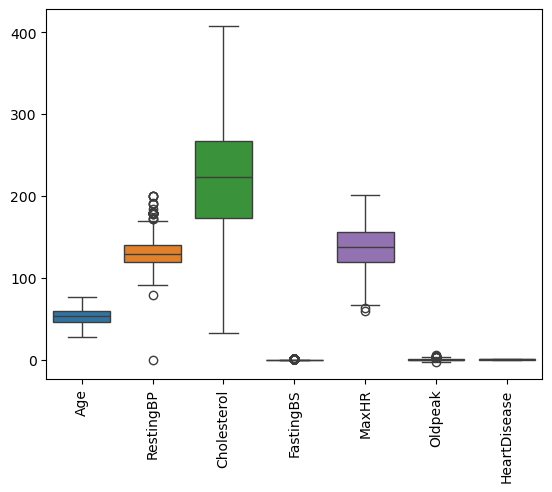

In [ ]:
sns.boxplot(data=df2)
plt.xticks(rotation=90)

plt.show()

2. Eassy way Use Clip-------------------------------------------

In [ ]:
df3 = df.copy()
df3["Cholesterol"] = df3["Cholesterol"].clip(lower,upper)

In [ ]:
x = df3.loc[df2["Cholesterol"] > upper]
x1 = df3.loc[df2["Cholesterol"] < lower]
print(len(x))
print(len(x1))

0
0


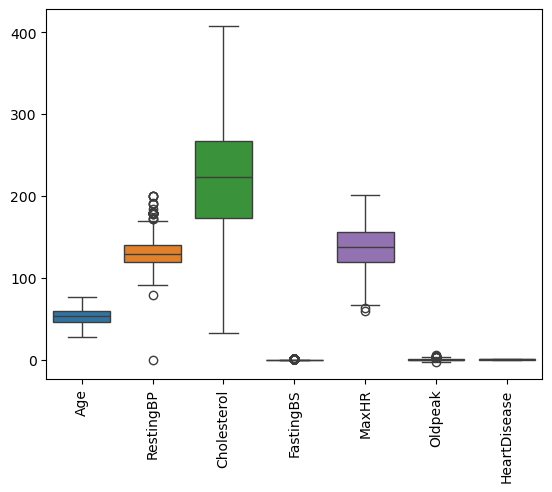

In [ ]:
sns.boxplot(data=df3)
plt.xticks(rotation=90)

plt.show()

# 3. Use log to Handle outlier (best practice)

In [ ]:
df4 = df.copy()

df4["Cholesterol" + "_log"] = np.log(df4["Cholesterol"] + 1)

In [ ]:
df4.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_log
598,55,M,ASY,120,226,0,LVH,127,Y,1.7,Down,1,5.424950
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0,5.170484
144,56,F,ATA,120,279,0,Normal,150,N,1.0,Flat,1,5.634790
386,42,M,ASY,145,0,0,Normal,99,Y,0.0,Flat,1,0.000000
440,52,M,NAP,128,0,0,ST,180,N,3.0,Up,1,0.000000
39,48,F,ASY,150,227,0,Normal,130,Y,1.0,Flat,0,5.429346
656,62,F,ASY,124,209,0,Normal,163,N,0.0,Up,0,5.347108
785,69,M,TA,160,234,1,LVH,131,N,0.1,Flat,0,5.459586
441,69,M,ASY,130,0,1,ST,129,N,1.0,Flat,1,0.000000
444,56,M,ASY,120,100,0,Normal,120,Y,1.5,Flat,1,4.615121


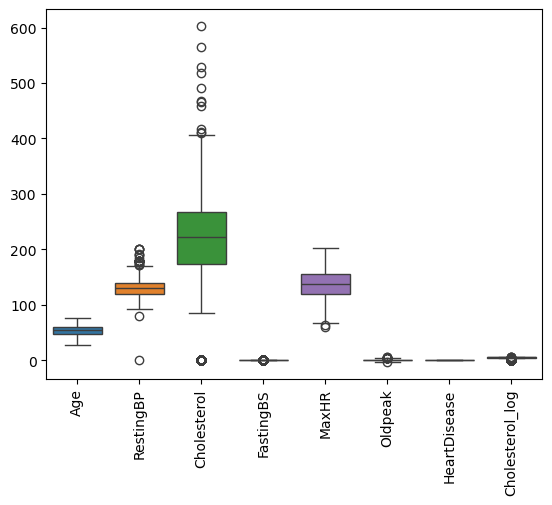

In [ ]:
sns.boxplot(data=df4)
plt.xticks(rotation=90)

plt.show()